c:\Users\sharg\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 7183/7183 [29:12<00:00,  4.10it/s]


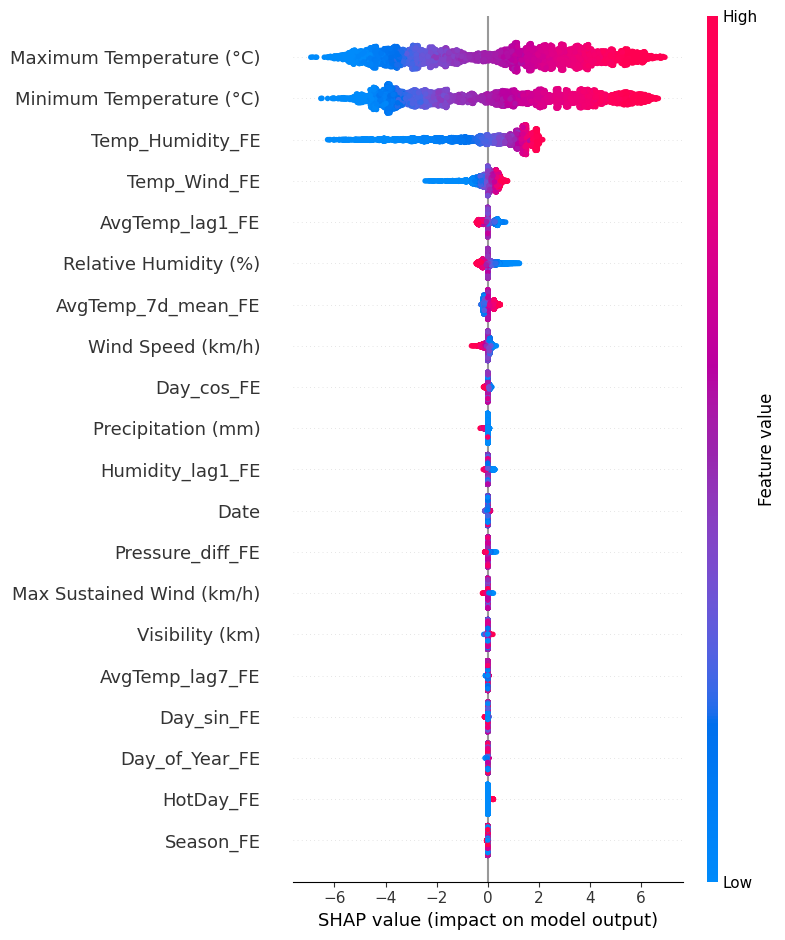

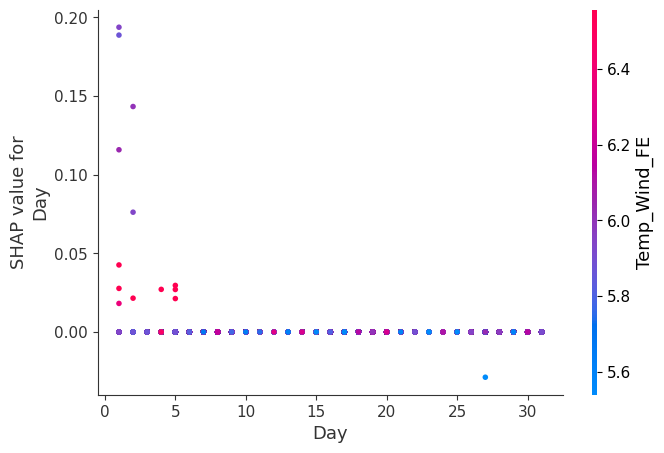

In [1]:
import shap
import pandas as pd
import joblib
import numpy as np

# Load data
data_path = r"C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\3-oy\final\Climate YEOSU\data\Feature_Selection\yeosu_weather_selected.csv"
df = pd.read_csv(data_path)

# Features and target
target_col = "Average Temperature (°C)"
X = df.drop(columns=[target_col])
y = df[target_col]

# Load trained GradientBoosting model
model_path = r"C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\3-oy\final\Climate YEOSU\models\best_model\best_model.pkl"
model = joblib.load(model_path)

# Kernel SHAP requires a small background dataset (e.g., 100 random rows)
background = X.sample(100, random_state=42)

# Create KernelExplainer
explainer = shap.KernelExplainer(model.predict, background)

# Compute SHAP values for all data (can be slow)
shap_values = explainer.shap_values(X)

# Summary plot
shap.summary_plot(shap_values, X)

# Example: dependence plot for top feature
top_feature = X.columns[0]
shap.dependence_plot(top_feature, shap_values, X)


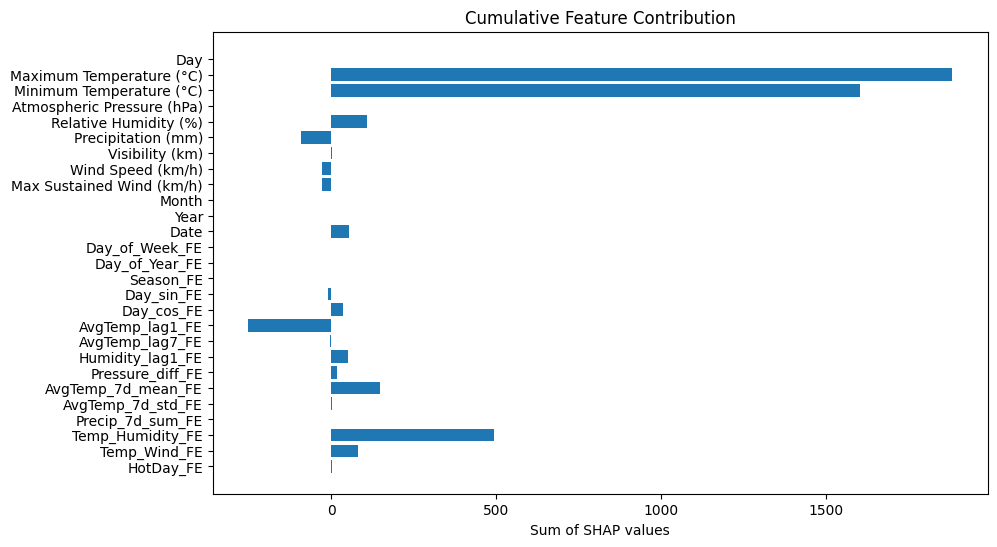

In [3]:
# Sum SHAP values for each feature across all samples
import matplotlib.pyplot as plt
sum_shap = shap_values.sum(axis=0)

plt.figure(figsize=(10,6))
plt.barh(X.columns, sum_shap)
plt.gca().invert_yaxis()
plt.xlabel("Sum of SHAP values")
plt.title("Cumulative Feature Contribution")
plt.show()


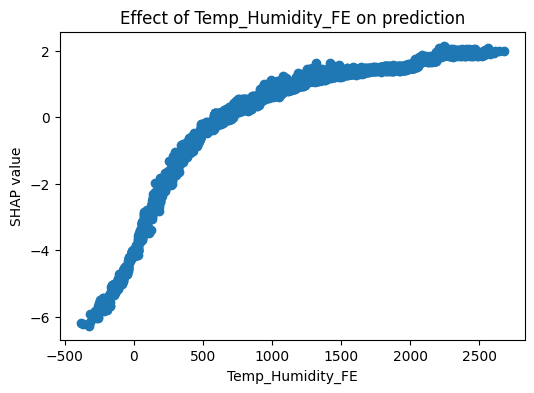

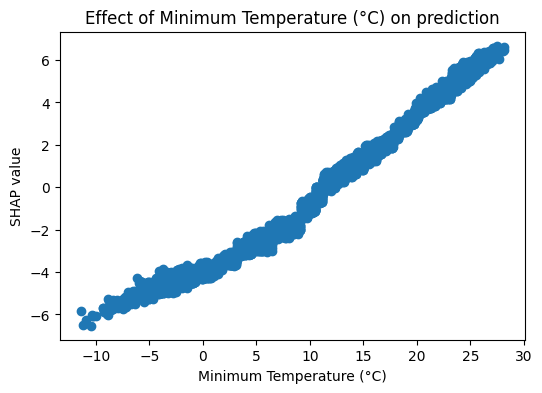

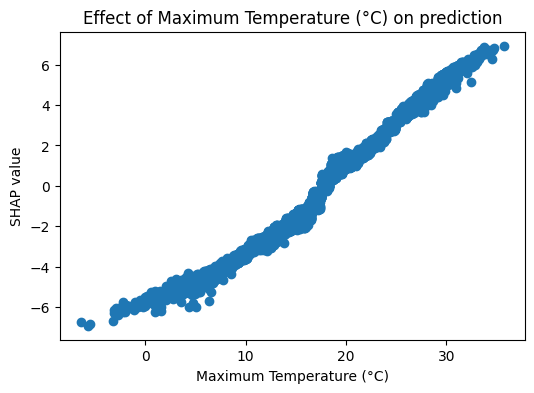

In [4]:
top_features = X.columns[np.argsort(np.abs(shap_values).mean(axis=0))[-3:]]

for feature in top_features:
    plt.figure(figsize=(6,4))
    plt.scatter(X[feature], shap_values[:, X.columns.get_loc(feature)])
    plt.xlabel(feature)
    plt.ylabel("SHAP value")
    plt.title(f"Effect of {feature} on prediction")
    plt.show()


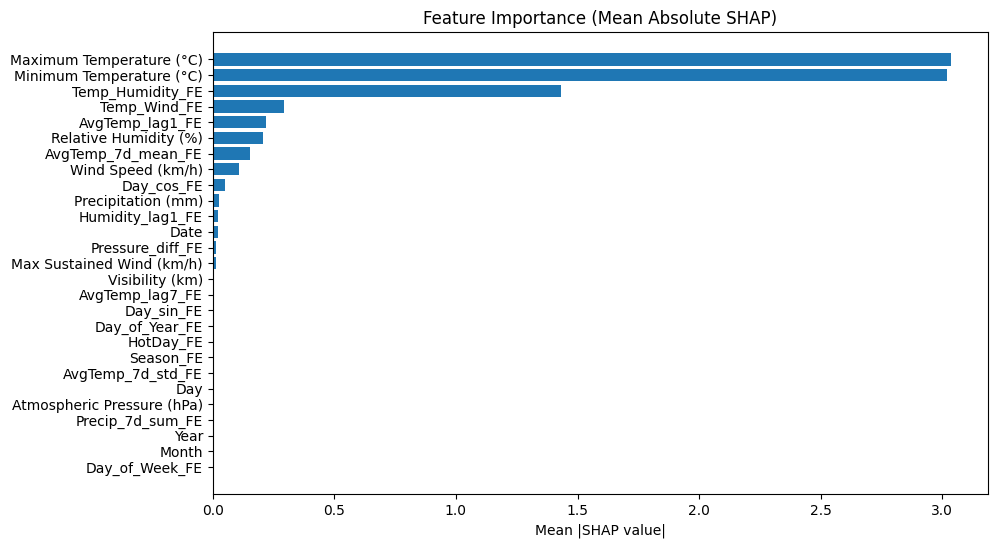

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Compute mean absolute SHAP value for each feature
mean_shap = np.abs(shap_values).mean(axis=0)

# Sort features by importance
feature_importance = dict(zip(X.columns, mean_shap))
feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

# Plot
plt.figure(figsize=(10,6))
plt.barh(list(feature_importance.keys()), list(feature_importance.values()))
plt.gca().invert_yaxis()  # highest importance at top
plt.xlabel("Mean |SHAP value|")
plt.title("Feature Importance (Mean Absolute SHAP)")
plt.show()
